# Frozen Lake with Q-Learning

#### Code Source: for basic initialization adapted from https://github.com/Viddesh1/RL/blob/main/Mini_Project.ipynb

### Import Libraries

In [1]:
# Importing the necessary libraries for standard Frozen Lake
import numpy as np # For fast numeric / linear algebra computation.
import time        # For controling time of execution.  
import pickle      # For storing updated Q-table.
import gym         # For working with open AI frozen lake v1 environment and utilities.
import matplotlib.pyplot as plt # For plotting rewards over iterations.
from IPython.display import display, clear_output # For animating notebook output

# Importing the necessary libraries for Frozen Lake 2.0
from gym.envs.toy_text.frozen_lake import generate_random_map, FrozenLakeEnv # For taking basics from standard Frozen lake to adapt to our use case
from contextlib import closing  # Ensures proper cleanup of resources
from io import StringIO  # In-memory text stream for ANSI rendering

### Set Hyperparameters

In [2]:
# Hyper-Parameters for both standard and 2.0
total_episodes = 10000 # Total number of iterations or episodes of training.

# A higher value of epsilon encourages more exploration, while a lower value of epsilon favors exploitation.
initial_epsilon = 1.0   # Initial exploration rate
min_epsilon = 0.1       # Minimum exploration rate (increased to ensure exploration)
epsilon_decay = 0.999 # Slow decay to allow exploration

max_steps = 100 # Maximum number of steps that agent can take in environment

lr_rate = 0.81 # Learning Rate of convergence to global minimum

# A high discount factor means that future rewards are highly valued, while a 
# low discount factor means that immediate rewards are given greater weight
gamma = 0.96 # Discount Factor, Positive real number (0 < gamma < 1)

## Frozen Lake Standard Implementation

### Create Environment from OpenGym

In [3]:
# creating environment using gym package.
env = gym.make('FrozenLake-v1', render_mode="ansi", is_slippery=False) # ansi to render because JN has some issues with rendering #4x4 Lake 
# if wanted -> set: is_slippery=True for more complex example, or =False for guaranteed solution

print("Number of observation states: ", env.observation_space.n)
print("Number of action space : ", env.action_space.n)

Number of observation states:  16
Number of action space :  4


### Initialize Q-Table for Training

In [4]:
# Initializing the Q-table with zeros for 2-D array of (observation_space, action_space).
Q = np.zeros((env.observation_space.n, env.action_space.n))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Define Action Selection Function

In [5]:
def choose_action(state, epsilon):
    """ 
    The choose_action() function used a Epsilon-Greedy policy for Exploration and Exploitation.
    
    Exploration is done when uniform random number from 0 to 1 is less than epsilon value.
    Else, Maximum value of the state and action pair is taken which is Exploitation.

    Args:
        state (int): Gets the current state as parameter/

    Returns:
        int: Returns action to be taken in that state
    """
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore: choose a random action
    else:
        return np.argmax(Q[state, :])     # Exploit: choose the action with the highest value

### Define Learning Function

In [6]:
def learn(state, state2, reward, action):
    """ 
    Updates the Q-table.
    Agent learn to find a optimal policy by using bellman optimality equation.

    Args:
        state (int): Current state
        state2 (int): Future state
        reward (int): Reward if rached to goal state
        action (int): action states
    """
    predict = Q[state, action]
    target = reward + gamma * np.max(Q[state2, :])
    Q[state, action] = Q[state, action] + lr_rate * (target - predict)


### Look at a Try Before Training

In [7]:
# Reset environment to initial state
state, _ = env.reset()

# Render the initial state
print(env.render())

# Take a few random steps to see the environment in action
for _ in range(5):
    action = env.action_space.sample()  # Choose a random action
    state, reward, done, truncated, info = env.step(action)
    print(env.render())
    if done:
        break


SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG



C:\Users\Janika\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


#### Frozen Lake Environment and Meaning of Fields

### Train Agent

In [8]:
rewards = []
epsilon = initial_epsilon

for episode in range(total_episodes):
    state, _ = env.reset()
    total_reward = 0
    
    for t in range(max_steps):
        action = choose_action(state, epsilon)
        state2, reward, done, truncated, info = env.step(action)
        
        learn(state, state2, reward, action)
        
        total_reward += reward
        state = state2
        
        if done:
            break
    
    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    
    rewards.append(total_reward)

### Plot Reward Function Over Iterations of Training

#### Only Reward is Given for Reaching Goal (+1)

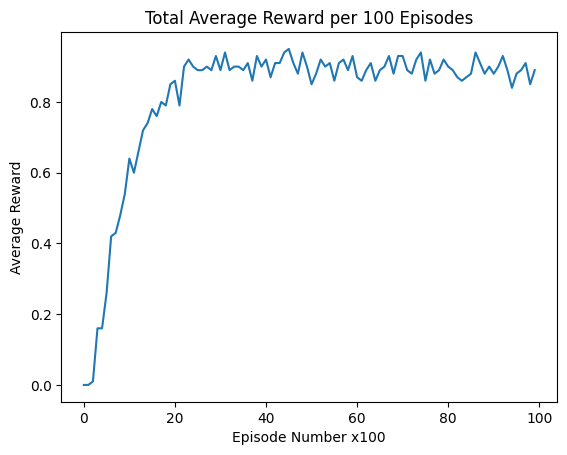

In [9]:
# Function to check learning progress via average rewards
def plot_metrics(episodes, rewards):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episodes, rewards, label='Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward per Episode')

    plt.show()

# Calculate average rewards over 100 episodes
avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(np.mean(rewards[i:i+100]))

### Plot Rewards over Iterations to see progress
plt.plot(avg_rewards)
plt.xlabel('Episode Number x100')
plt.ylabel('Average Reward')
plt.title('Total Average Reward per 100 Episodes')
plt.show()

### Look at a Walkthrough after Training

In [10]:
# Render the environment after training is complete
state, _ = env.reset()  # Reset the environment for the final render
t = 0

print("Final try after training:")
while t < max_steps:
    print(env.render())  # Render the environment after training

    action = np.argmax(Q[state, :])  # Take the best action based on the learned Q-table
    state, reward, done, truncated, info = env.step(action)  # Take action and observe outcome
    t += 1

    if done:  # End episode if goal is reached
        break

    time.sleep(0.1)  # Slow down the process for better observation

Final try after training:

SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG



### Look at and Save Our Trained Q-Table

In [11]:
Q

array([[0.78275779, 0.8153727 , 0.8153727 , 0.78275779],
       [0.78275779, 0.        , 0.84934656, 0.8153727 ],
       [0.81536969, 0.884736  , 0.81536502, 0.84934053],
       [0.84934537, 0.        , 0.        , 0.45436038],
       [0.8153727 , 0.84934656, 0.        , 0.78275779],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9216    , 0.        , 0.82498642],
       [0.        , 0.        , 0.        , 0.        ],
       [0.84934656, 0.        , 0.884736  , 0.8153727 ],
       [0.84934656, 0.9216    , 0.9216    , 0.        ],
       [0.884736  , 0.96      , 0.        , 0.884736  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9216    , 0.96      , 0.884736  ],
       [0.9216    , 0.96      , 1.        , 0.9216    ],
       [0.        , 0.        , 0.        , 0.        ]])

In [12]:
# Dumping the Q-table in pickle file for easy loading when needed.
with open("frozenLake_qTable.pkl", 'wb') as f:
    pickle.dump(Q, f)

## Frozen Lake 2.0

### Create a Custom Frozen Lake Environment

#### Code source: own creation

In [13]:
class CustomFrozenLakeEnv(FrozenLakeEnv):
    def __init__(self, desc=None, map_name="8x8", is_slippery=False):
        if desc is not None:
            desc = np.array([list(row) for row in desc], dtype='c') # If a custom description of the grid is provided, convert it into a numpy array of type 'c'
        super().__init__(desc=desc, map_name=map_name, is_slippery=is_slippery) # Initialize the superclass with the provided description, map name, and slipperiness setting
        self.booster_tile = 'B' # Set the booster tile character, which accelerates the movement of whoever steps on it
        self.goal_tile = 'G' # Set the goal tile character, reaching this tile typically signifies completion of the level
        self.hole_tile = 'H' # Set the hole tile character, stepping on this tile usually results in a penalty or game over
        self.enemy_tile = 'E' # Set the enemy tile character, denotes the presence of an enemy
        self.frozen_tile = 'F' # Set the frozen tile character, typically represents safe, inert ground
        self.weapon_tile = 'W' # Set the weapon tile character, picking up this item may grant benefits like defeating enemies
        self.boost_active = False # Initialize the boost active flag as False, determines if the boost is currently active for the agent
        self.has_weapon = False # Initialize the has weapon flag as False, indicates if the agent has picked up a weapon
        self.agent_pos = (0, 0)  # Agent starts in the top left corner
        self.enemy_pos = (3, 7)  # Initialize enemy position
        self.weapon_pos = (2, 1) # Position of the weapon
        self.goal_pos = (7, 7) # Goal is always in bottom right corner
        self.desc_original = self.desc.copy()  # Store the original description map
        self.original_tile_enemy = 'F' # Replaces Enemy's tile after it starts moving
        self.enemy_active = True # Flag to track if the enemy is currently active in the game
        self.enemy_collision = False # Flag to check if a collision between the enemy and the agent has occurred

    def reset(self, **kwargs):
        self.boost_active = False
        state = super().reset(**kwargs)
        self.agent_pos = (0, 0)  # Agent starts in the top left corner
        self.enemy_pos = (3, 7)  # Initialize enemy position
        self.weapon_pos = (2, 1) # Initialize weapon position
        self.desc = self.desc_original.copy()  # Reset the description map
        self.desc[self.enemy_pos[0]][self.enemy_pos[1]] = self.enemy_tile.encode()  # Place enemy on the map again
        self.desc[self.weapon_pos[0]][self.weapon_pos[1]] = self.weapon_tile.encode()  # Place weapon on the map again
        self.has_weapon = False # Reset weapon status
        self.enemy_active = True  # Reset enemy status
        self.enemy_collision = False # Enemy did not catch agent
        return state

    def step(self, action):
        truncated = False  # Assume no truncation
        done = False  # Game is not over by default

        if self.boost_active:
            self.boost_active = False  # Reset the boost after using it
            next_state = self.skip_step(self.s, action)  # Special boosted step
            if next_state is None:
                # If the skip step results in an invalid state, perform a normal step
                next_state, reward, done, truncated, info = super().step(action)
            else:
                # Properly decode the new state if it's valid
                self.s = next_state
                self.agent_pos = divmod(self.s, self.ncol)
        else:
            next_state, reward, done, truncated, info = super().step(action)
            self.s = next_state  # Update the state after normal move
            self.agent_pos = divmod(self.s, self.ncol)

        # Move the enemy before checking the results of the agent's move
        self.move_enemy()

        row, col = self.agent_pos
        current_tile = self.desc[row][col]

        # Check and handle the current tile type
        if current_tile == self.weapon_tile.encode():
            self.has_weapon = True
            self.desc[row][col] = self.frozen_tile.encode()  # Change weapon tile to a normal tile
        elif current_tile == self.booster_tile.encode():
            self.boost_active = True  # Reactivate boost if landing on another booster

        # Handling enemy collision or enemy tile encounter without a weapon
        if self.enemy_collision or (current_tile == self.enemy_tile.encode() and not self.has_weapon):
            done = True  # Game over by enemy
            reward = self.get_reward(row, col)  # Get reward associated with this outcome

        # Check for other game over conditions: goal or hole
        elif current_tile in [self.goal_tile.encode(), self.hole_tile.encode()]:
            done = True
            reward = self.get_reward(row, col)  # Get reward for reaching the goal or falling into a hole
        else:
            # Update reward if no other conditions were met
            reward = self.get_reward(row, col)

        return next_state, reward, done, truncated, {}

    def skip_step(self, state, action):
        """
        If agent lands on a boost field, the next step will be 2 tiles long instead of one
        """
        row, col = divmod(state, self.ncol)
        if action == 0:  # Left
            col = max(0, col - 2)
        elif action == 1:  # Down
            row = min(self.nrow - 1, row + 2)
        elif action == 2:  # Right
            col = min(self.ncol - 1, col + 2)
        elif action == 3:  # Up
            row = max(0, row - 2)

        new_state = row * self.ncol + col  # Calculate the new state

        # Ensure the new state is valid (in range)
        if 0 <= new_state < self.nrow * self.ncol:
            return new_state
        else:
            return None  # If invalid, return None

    def move_enemy(self):
        """
        Moves the enemy towards the agent's position. The enemy moves directly towards the agent
        unless such a move would cause it to enter a hole, then it jumps over the hole.
        """
        if not self.enemy_active:
            return

        # Restore the original content of the enemy's current tile before moving
        enemy_row, enemy_col = self.enemy_pos
        original_tile = self.desc_original[enemy_row][enemy_col]
        self.desc[enemy_row][enemy_col] = original_tile

        agent_row, agent_col = self.agent_pos

        # Calculate the best move towards the agent, avoiding holes if possible
        best_row = enemy_row + (1 if enemy_row < agent_row else -1 if enemy_row > agent_row else 0)
        best_col = enemy_col + (1 if enemy_col < agent_col else -1 if enemy_col > agent_col else 0)

        # Ensure the new position is within grid bounds
        best_row = max(0, min(self.nrow - 1, best_row))
        best_col = max(0, min(self.ncol - 1, best_col))

        # Avoid moving into a hole, fallback to original position if no better option exists
        if self.desc[best_row][best_col] == self.hole_tile.encode():
            best_row, best_col = enemy_row, enemy_col

        # Update the enemy's position
        self.enemy_pos = (best_row, best_col)
        self.desc[best_row][best_col] = self.enemy_tile.encode()

        # Check for collision with the agent
        if (best_row, best_col) == (agent_row, agent_col):
            if self.has_weapon:
                self.remove_enemy()  # Enemy defeated by agent
            else:
                self.enemy_collision = True  # Indicate a collision where enemy defeats agent
                
    def remove_enemy(self): # Remove Enemy once defeated
        self.desc[self.enemy_pos[0]][self.enemy_pos[1]] = self.frozen_tile.encode()
        self.enemy_pos = (-1, -1)
        self.enemy_active = False
    
    def get_reward(self, row, col):
        if self.desc[row][col] == self.goal_tile.encode():
            return 20  # High reward for reaching the goal
        elif self.desc[row][col] == self.hole_tile.encode():
            return -20  # High penalty for falling into a hole
        elif self.desc[row][col] == self.enemy_tile.encode() and not self.has_weapon:
            return -20  # High penalty for colliding with the enemy
        elif self.desc[row][col] == self.weapon_tile.encode():
            return 5  # Reward for collecting weapon
        elif self.desc[row][col] == self.enemy_tile.encode() and self.has_weapon:
            return 10  # Reward for defeating the enemy
        else:
            return -0.5 # Small penalty for each step taken to motivate shortes route

    def render(self, mode='ansi', action=None):
        desc = self.desc.tolist()
        if mode == 'ansi':
            desc = [[c.decode('utf-8') for c in line] for line in desc]
            output = StringIO()
            if action is not None:
                output.write(f"Action taken: {ACTION_NAMES[action]}\n")
            for i, row in enumerate(desc):
                for j, cell in enumerate(row):
                    if (i, j) == self.agent_pos:
                        output.write('\033[94m' + 'A' + '\033[0m' + ' ')  # Highlight the agent position in blue
                    elif (i, j) == self.enemy_pos:
                        output.write('\033[91m' + 'E' + '\033[0m' + ' ')  # Highlight the enemy position in red
                    else:
                        output.write(cell + ' ')
                output.write('\n')
            return output.getvalue()
        else:
            return super().render(mode)

### Define Custom Map with Booster Tile

In [14]:
# ANSI rendering for JN doesn't seem to be working for custom environment so workaround for visualization is needed
# Define action names for clarity in rendering
ACTION_NAMES = ["Left", "Down", "Right", "Up"]

# Example custom map with boosters B and enemy E
custom_map = [
    "FBFFFBFF", # Agents starts in top left corner # Booster allows to move 2 tiles at once and jump across holes
    "FHHHFHFB", 
    "HWFBFFFF", # Weapon, agent will have to reach this tile before meeting enemy -> weapon has to be reachable before enemy gets too close
    "BHFFHFFF", # Enemy starts here at the very right and is a dynamic antagonist chasing the agent -> if caught -> end of game
    "FFHFFFHF",
    "FBFFHFFB",
    "FFFHFFHH",
    "FFFHFFHG"  # Goal is surrounde by holes so agent *has* to find the booster to jump across
]

env_new = CustomFrozenLakeEnv(desc=custom_map, is_slippery=False)
#env_new = CustomFrozenLakeEnv(is_slippery=False)

print("Number of observation states: ", env_new.observation_space.n)
print("Number of action space : ", env_new.action_space.n)

Number of observation states:  64
Number of action space :  4


C:\Users\Janika\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym\envs\toy_text\frozen_lake.py:181: RuntimeWarning: invalid value encountered in divide
  self.initial_state_distrib /= self.initial_state_distrib.sum()


### Define Action Function

In [15]:
def choose_action_new(state, epsilon):
    """
    The choose_action() function uses an epsilon-greedy policy for exploration and exploitation.

    Args:
        state (int): Current state.
        epsilon (float): Exploration rate.

    Returns:
        int: Action to be taken in that state.
    """
    if np.random.uniform(0, 1) < epsilon:
        return env_new.action_space.sample()  # Explore: choose a random action
    else:
        return np.argmax(Q_new[state, :])     # Exploit: choose the action with the highest value

### Define Learning Function

In [16]:
def learn_new(state, state2, reward, action):
    """
    Updates the Q-table.

    Args:
        state (int): Current state
        state2 (int): Future state
        reward (int): Reward if reached the goal state
        action (int): Action taken
    """
    predict = Q_new[state, action]
    target = reward + gamma * np.max(Q_new[state2, :])
    Q_new[state, action] = Q_new[state, action] + lr_rate * (target - predict)

### Initialize New Q-Table

In [17]:
# Initialize the Q-table
Q_new = np.zeros((env_new.observation_space.n, env_new.action_space.n))
Q_new

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


### Look at a Try Before Training

In [18]:
# Reset environment to initial state
state, _ = env_new.reset()

# Render the initial state
print(env_new.render())

# Take a few random steps to see the environment in action
for _ in range(4):
    action = env_new.action_space.sample()  # Choose a random action
    state, reward, done, truncated, info = env_new.step(action)
    print(env_new.render(action=action))
    if done:
        break

A B F F F B F F 
F H H H F H F B 
H W F B F F F F 
B H F F H F F E 
F F H F F F H F 
F B F F H F F B 
F F F H F F H H 
F F F H F F H G 

Action taken: Down
F B F F F B F F 
A H H H F H F B 
H W F B F F E F 
B H F F H F F F 
F F H F F F H F 
F B F F H F F B 
F F F H F F H H 
F F F H F F H G 

Action taken: Down
F B F F F B F F 
F H H H F H F B 
A W F B F E F F 
B H F F H F F F 
F F H F F F H F 
F B F F H F F B 
F F F H F F H H 
F F F H F F H G 



### Train Agent

In [19]:
rewards_new = []
epsilon = initial_epsilon

for episode in range(total_episodes):
    state, _ = env_new.reset()
    total_reward = 0

    for t in range(max_steps):
        action = choose_action_new(state, epsilon)
        state2, reward, done, truncated, info = env_new.step(action)

        learn_new(state, state2, reward, action)

        total_reward += reward
        state = state2

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    rewards_new.append(total_reward)

### Plot Reward Function Over Iterations of Training

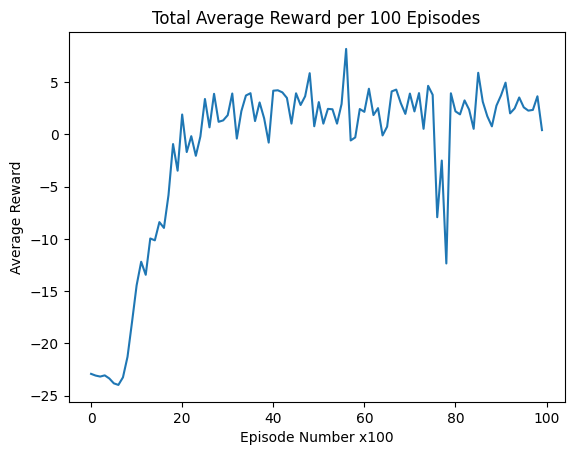

In [20]:
# Calculate average reward per 100 episodes
avg_rewards_new = []
for i in range(0, len(rewards_new), 100):
    avg_rewards_new.append(np.mean(rewards_new[i:i + 100]))

plt.plot(avg_rewards_new)
plt.xlabel('Episode Number x100')
plt.ylabel('Average Reward')
plt.title('Total Average Reward per 100 Episodes')
plt.show()


### Look at a Walkthrough after Training

In [21]:
# Render the environment after training is complete
state, _ = env_new.reset()  # Reset the environment for the final render
t = 0

print("Final try after training:")

# Print initial state of the environment
print("Initial State:")
print(env_new.render())  # Render the initial state of the environment

while t < max_steps:
    action = np.argmax(Q_new[state, :])  # Take the best action based on the learned Q-table
    state, reward, done, truncated, info = env_new.step(action)  # Take action and observe outcome
    print(f"Step {t + 1}:")
    print(env_new.render(action=action))  # Render the environment after each step
    t += 1

    if done:  # End episode if goal is reached
        break


Final try after training:
Initial State:
A B F F F B F F 
F H H H F H F B 
H W F B F F F F 
B H F F H F F E 
F F H F F F H F 
F B F F H F F B 
F F F H F F H H 
F F F H F F H G 

Step 1:
Action taken: Right
F A F F F B F F 
F H H H F H F B 
H W F B F F E F 
B H F F H F F F 
F F H F F F H F 
F B F F H F F B 
F F F H F F H H 
F F F H F F H G 

Step 2:
Action taken: Down
F B F F F B F F 
F H H H F H F B 
H A F B F E F F 
B H F F H F F F 
F F H F F F H F 
F B F F H F F B 
F F F H F F H H 
F F F H F F H G 

Step 3:
Action taken: Right
F B F F F B F F 
F H H H F H F B 
H F A B E F F F 
B H F F H F F F 
F F H F F F H F 
F B F F H F F B 
F F F H F F H H 
F F F H F F H G 

Step 4:
Action taken: Down
F B F F F B F F 
F H H H F H F B 
H F F B F F F F 
B H A E H F F F 
F F H F F F H F 
F B F F H F F B 
F F F H F F H H 
F F F H F F H G 

Step 5:
Action taken: Right
F B F F F B F F 
F H H H F H F B 
H F F B F F F F 
B H F A H F F F 
F F H F F F H F 
F B F F H F F B 
F F F H F F H H 
F F F H F F H G 


### Look at and Save Our Trained Q-Table


In [22]:
Q_new

array([[  7.41306711,   6.61654443,   8.24277824,   7.41306711],
       [  7.41306711,   9.10706067,   6.62157385,   8.24277824],
       [  8.24289559, -20.        ,   4.79471028,  -2.80274952],
       [  7.41450401, -20.        ,   2.7465004 ,  -3.23534647],
       [ -3.02218742,   7.8813696 ,  -3.14688251, -17.03111096],
       [ -3.23913194,  -9.25602596,  -2.90762992,  -4.89876563],
       [ -5.01499338,  -1.28305601,  -1.97065518,  -0.405     ],
       [ -4.06782   ,   5.48165383, -24.27416255,  -8.02692798],
       [  6.55084588, -20.        , -20.        ,   7.41306711],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [-20.        ,   9.46535653, -19.99999977,  -2.70098201],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [-16.2       ,  -1.5822923 ,  -1.24142889,  -0.87464052],
       [-19.86282   ,  14

In [23]:
# Dumping the Q-table in pickle file for easy loading when needed.
with open("frozenLake_new_qTable.pkl", 'wb') as f:
    pickle.dump(Q_new, f)

## Visualize Results

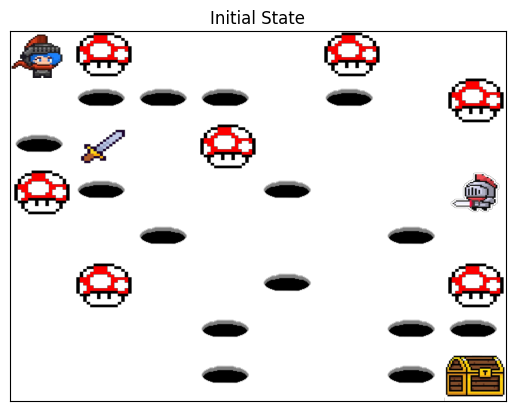

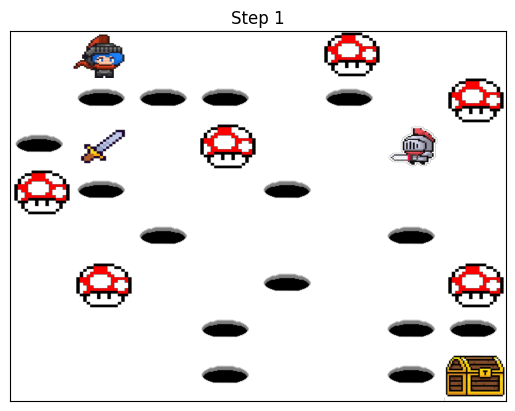

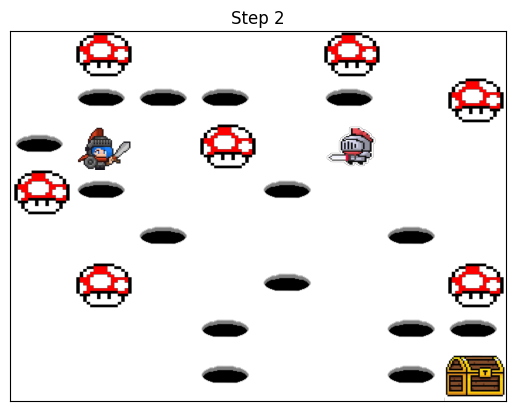

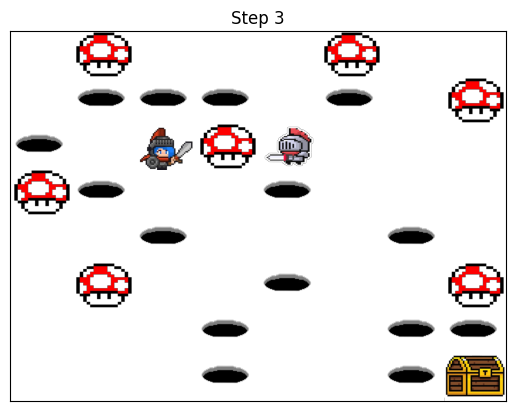

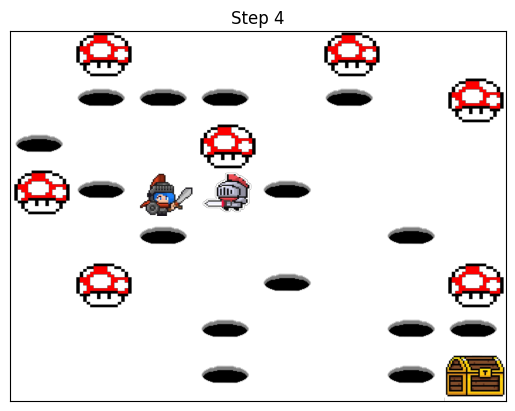

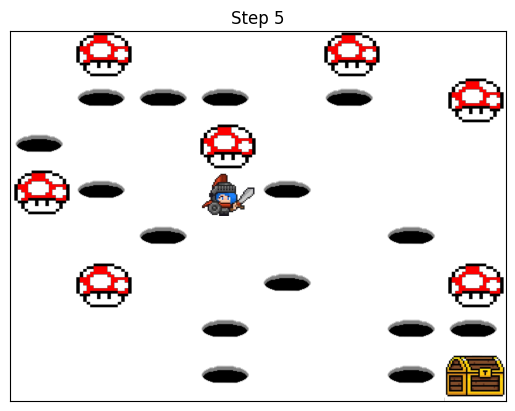

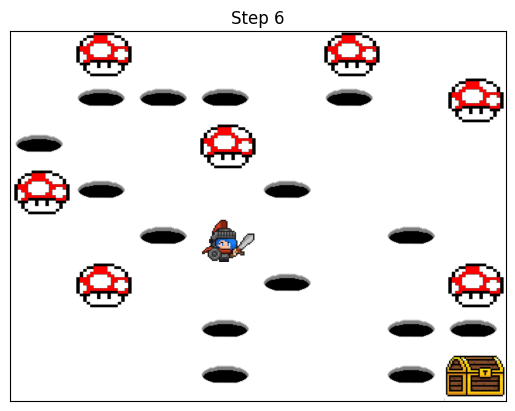

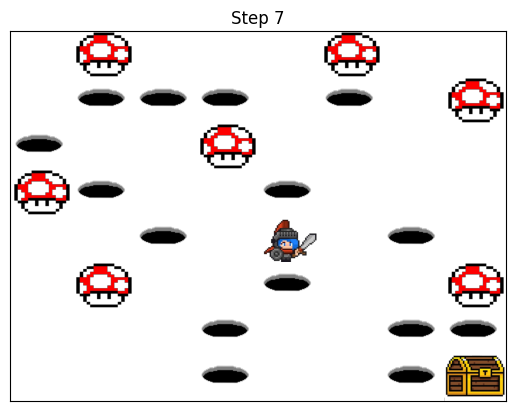

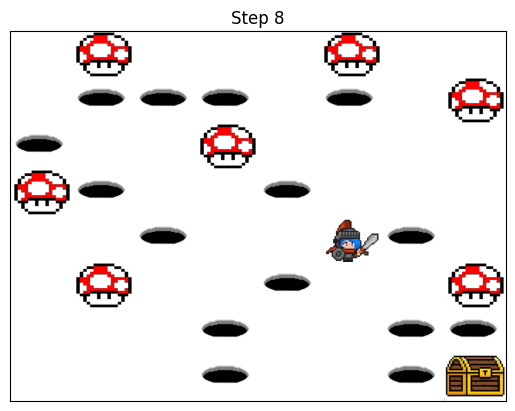

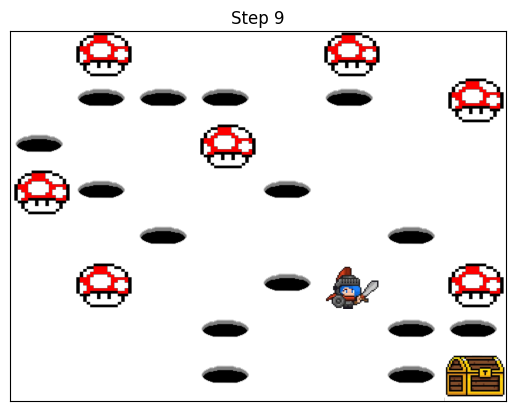

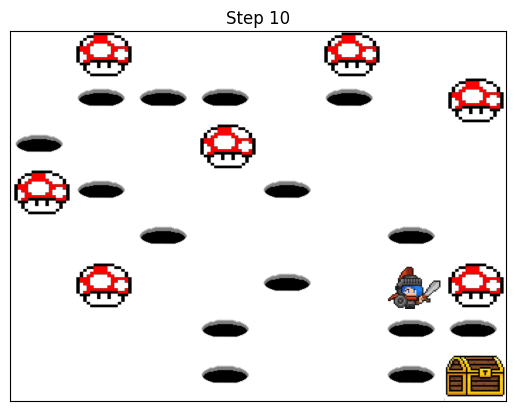

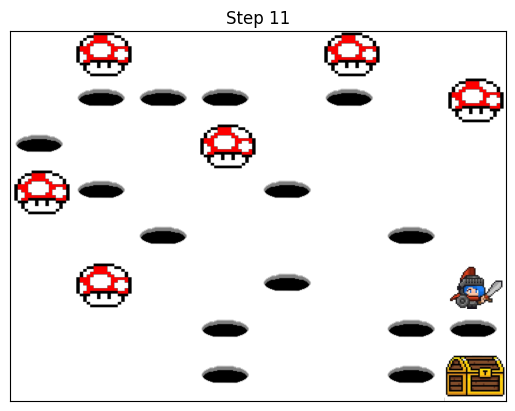

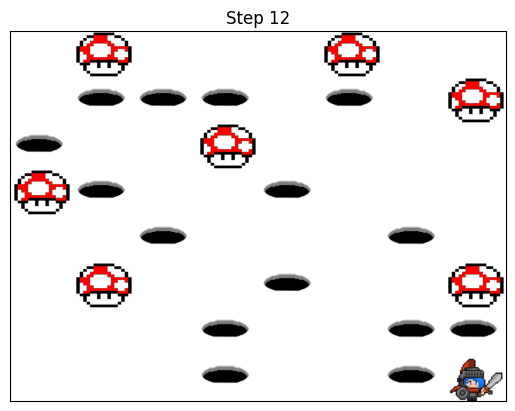

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def plot_environment(env, title="Frozen Lake Environment"):
    desc = env.desc  # Directly use the environment's description
    
    # Define the path to your images
    image_files = {
        'H': 'images/hole.png',
        'W': 'images/sword.png',
        'G': 'images/goal.png',
        'E': 'images/enemy.png',
        'B': 'images/booster.png',
        'A': 'images/knight.png',  # Agent without weapon
        'A_weapon': 'images/knight_sword.png'  # Agent with weapon
    }

    # Load images
    images = {k: mpimg.imread(v) for k, v in image_files.items()}

    # Create the plot
    fig, ax = plt.subplots()
    ax.set_xlim(-0.5, env.ncol - 0.5)
    ax.set_ylim(-0.5, env.nrow - 0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    
    # Plot each tile using the corresponding image
    for i in range(env.nrow):
        for j in range(env.ncol):
            tile = desc[i, j].decode('utf-8')  # Decode each tile
            if (i, j) == env.agent_pos:
                img = images['A_weapon'] if env.has_weapon else images['A']
            else:
                img = images.get(tile)

            if img is not None:  # Only plot if the image exists
                ax.imshow(img, aspect='auto', extent=(j-0.5, j+0.5, env.nrow-i-1-0.5, env.nrow-i-1+0.5))
    plt.show()

# Example usage
state, _ = env_new.reset()
plot_environment(env_new, title="Initial State")

for _ in range(max_steps):
    action = np.argmax(Q_new[state, :])
    state, reward, done, truncated, info = env_new.step(action)
    plot_environment(env_new, title=f"Step {_ + 1}")
    if done:
        break